# Sobel filter edge detection

This project utilises Sobel filter for an edge detection problem. This is often used in image processing, which can be applied in face recognition systems, extracting buildings from remotely senses images of cities or surface cracks caused by earthquakes from satelite images. A sample image of the Old Town in Warsaw is filtered using Sobel operator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
#plotting images
def make_image(inputname, title,sizeX,sizeY):
    n_images = len(inputname)
    plt.figure(figsize=(sizeX,sizeY))
    for i in range(n_images):
        plt.subplot(1,n_images,i+1)
        fig = plt.imshow(inputname[i])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        fig.set_cmap('gray')
        plt.title(title[i])
    

#convert RGB to grayscale
def rgb2gray(rgb):
    grayscale = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return np.rint(grayscale)

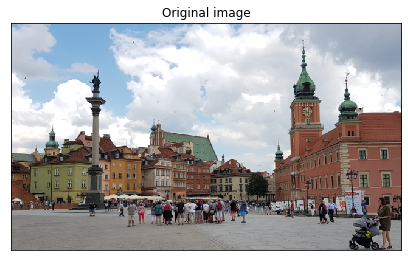

In [10]:
#read and display the image
original_image = imageio.imread('data/image.png')
image=rgb2gray(original_image)
make_image([original_image],["Original image"],7,7)

Given a function $\mathbf{B}$ and a filter function $\mathbf{f}$, most filtering operations are implemented using a convolution
integral to produce an output $\mathbf{O}$.

\begin{equation} 
\mathbf{O}(t) =\sum_{y=-\infty}^{y=\infty}\sum_{x=-\infty}^{x=\infty} \mathbf{B} (\tau_{x,y}) \mathbf{f} (t_{x,y}-\tau_{x,y})d\tau_{x,y}
\end{equation}


Here, the convulation is performed by sliding the filter kernel $\mathbf{f}$ over the image data $\mathbf{f}$. This is started from the top left corner and goes across all the positiontions of the pixels, where the filter fits entirely.

Let's look at the Sobel filter kernels:


\begin{equation*}
\begin{aligned}[c]
\mathbf{f}_x=\begin{bmatrix}
    +1 & 0 & -1 \\
    +2 & 0 & -2 \\
    +1 & 0 & -1
  \end{bmatrix}
\end{aligned}
\begin{aligned}[c]
\mathbf{f}_y=\begin{bmatrix}
    +1 & +2 & +1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1
  \end{bmatrix}
\end{aligned}
\end{equation*}

Therefore, the convuation can be rewritten as:

\begin{equation}
\mathbf{O}(t) =\sum_{k=1}^{m-1}\sum_{l=1}^{n-1} \mathbf{B}(i+k,j+l)\mathbf{f}(k,l)
\end{equation}

where, $i$, $j$ are locations in $\mathbf{B}$ and $\mathbf{O}$; $k$, $l$ are locations in $\mathbf{f}$; and $m$ and $n$ are the number of rows and columns in the kernel respectively. 

The filter is applied in both directions, to the original image. To get the fully filtered image the output of both kernels are combined using the root of the squares of the individual outputs:

\begin{equation}
\mathbf{O} = \sqrt{\mathbf{O}_x^2 + \mathbf{O}_y^2}
\end{equation}

In [4]:
kernelX = np.array([[+1, 0 ,-1], [+2, 0, -2], [+1, 0, -1]]); #create kernel X filter
kernelY = np.array([[+1, +2, +1], [0, 0, 0], [-1, -2, -1]]); #create kernel Y filter

# Sobel-filtered variants of the original image
sobelX = np.array([[np.sum(image[j-1:j+2, i-1:i+2] * kernelX) for i in range(1, image.shape[1]-1)] 
                   for j in range(1, image.shape[0]-1)])
sobelY = np.array([[np.sum(image[j-1:j+2, i-1:i+2] * kernelY) for i in range(1, image.shape[1]-1)] 
                   for j in range(1, image.shape[0]-1)])

sobel = np.sqrt(sobelX**2 + sobelY**2)

## Display images

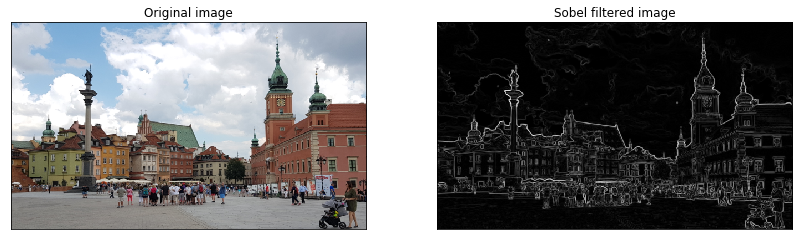

In [11]:
make_image([original_image,sobel],["Original image","Sobel filtered image"],14,14)

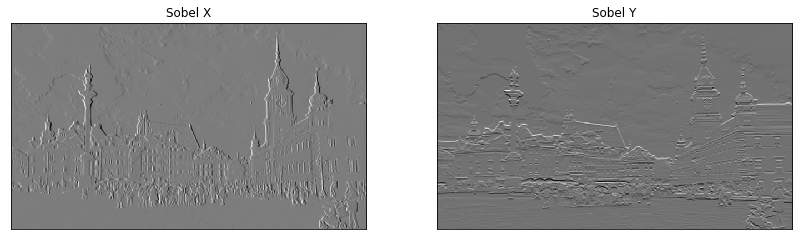

In [8]:
make_image([sobelX,sobelY],["Sobel X","Sobel Y"],14,14)